In [23]:
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from recycle_cnn import CNN



In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

trans = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])
test_set = torchvision.datasets.ImageFolder('data/test',transform=trans)
test_loader = DataLoader(test_set)

model = torch.load('best_model.pt')


In [ ]:
num_correct = 0
all_result = []

for x, y in test_loader:
    x = x.to(device)
    y = y.to(device)
    
    prediction = torch.argmax(model(x), 1)
    if prediction == y:
        num_correct += 1
    
    all_result.append([y.cpu().detach().numpy()[0], prediction.cpu().detach().numpy()[0]])

accuracy = num_correct / len(test_loader)


Overall Accuracy: 0.8422273781902552


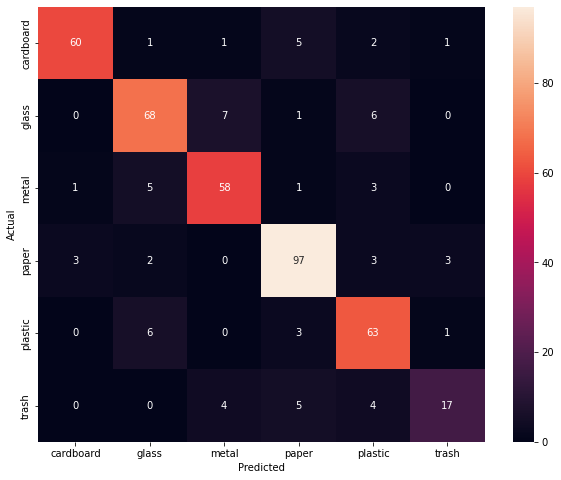

In [31]:
num_classes = len(test_set.classes)
cmt = torch.zeros(num_classes, num_classes, dtype=torch.int64)

for p in all_result:
    tl, pl = p
    cmt[tl, pl] = cmt[tl, pl] + 1

plt.figure(figsize=(10,8))
sns.heatmap(cmt, xticklabels=test_set.classes, yticklabels=test_set.classes, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('Overall Accuracy:', accuracy)
